<a href="https://colab.research.google.com/github/Anson1013/HW/blob/main/ch05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 9s 23ms/step - loss: 0.6190 - accuracy: 0.8110 - val_loss: 0.3022 - val_accuracy: 0.9083
Epoch 2/10
375/375 [==============================] - 7s 19ms/step - loss: 0.2516 - accuracy: 0.9213 - val_loss: 0.1954 - val_accuracy: 0.9394
Epoch 3/10
375/375 [==============================] - 7s 19ms/step - loss: 0.1647 - accuracy: 0.9498 - val_loss: 0.1406 - val_accuracy: 0.9597
Epoch 4/10
375/375 [==============================] - 7s 19ms/step - loss: 0.1164 - accuracy: 0.9631 - val_loss: 0.1541 - val_accuracy: 0.9543
Epoch 5/10
375/375 [==============================] - 8s 22ms/step - loss: 0.0843 - accuracy: 0.9729 - val_loss: 0.1325 - val_accuracy: 0.9628
Epoch 6/10
375/375 [==============================] - 7s 20ms/step - loss: 0.0628 - accuracy: 0.9801 - val_loss: 0.1148 - val_accuracy: 0.9664
Epoch 7/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0466 - accuracy: 0.9847 - val_loss: 0.1412 - val_accuracy: 0.9604

**Plotting a validation accuracy comparison**

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 5s 12ms/step - loss: 2.3167 - accuracy: 0.1044 - val_loss: 2.3057 - val_accuracy: 0.1045
Epoch 2/2
375/375 [==============================] - 4s 11ms/step - loss: 2.2998 - accuracy: 0.1159 - val_loss: 2.3085 - val_accuracy: 0.1036


#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 18ms/step - loss: 913.4846 - accuracy: 0.4590 - val_loss: 3.0264 - val_accuracy: 0.3106
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 9.2748 - accuracy: 0.2926 - val_loss: 2.4519 - val_accuracy: 0.2715
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 3.3121 - accuracy: 0.2665 - val_loss: 2.8579 - val_accuracy: 0.2774
Epoch 4/10
375/375 [==============================] - 5s 14ms/step - loss: 3.4031 - accuracy: 0.2713 - val_loss: 2.3614 - val_accuracy: 0.2793
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 3.4157 - accuracy: 0.2891 - val_loss: 2.0690 - val_accuracy: 0.2243
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 3.0525 - accuracy: 0.2884 - val_loss: 2.1361 - val_accuracy: 0.3019
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 2.4749 - accuracy: 0.2540 - val_loss: 2.2808 - val_accuracy: 0.28

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.3375 - accuracy: 0.9136 - val_loss: 0.1983 - val_accuracy: 0.9492
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1428 - accuracy: 0.9634 - val_loss: 0.1538 - val_accuracy: 0.9661
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1185 - accuracy: 0.9725 - val_loss: 0.1885 - val_accuracy: 0.9666
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1020 - accuracy: 0.9776 - val_loss: 0.2274 - val_accuracy: 0.9676
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0888 - accuracy: 0.9822 - val_loss: 0.2022 - val_accuracy: 0.9704
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0824 - accuracy: 0.9838 - val_loss: 0.2112 - val_accuracy: 0.9752
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0794 - accuracy: 0.9856 - val_loss: 0.2553 - val_accuracy: 0.9751

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.6674 - accuracy: 0.8358 - val_loss: 0.3571 - val_accuracy: 0.9045
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3502 - accuracy: 0.9036 - val_loss: 0.3066 - val_accuracy: 0.9128
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3148 - accuracy: 0.9124 - val_loss: 0.2894 - val_accuracy: 0.9194
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2990 - accuracy: 0.9158 - val_loss: 0.2801 - val_accuracy: 0.9215
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2892 - accuracy: 0.9189 - val_loss: 0.2754 - val_accuracy: 0.9245
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2827 - accuracy: 0.9208 - val_loss: 0.2712 - val_accuracy: 0.9253
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2781 - accuracy: 0.9224 - val_loss: 0.2708 - val_accuracy: 0.9243
Epoch 

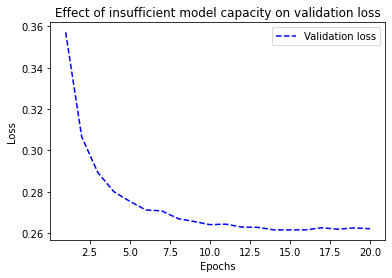

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3641 - accuracy: 0.8975 - val_loss: 0.1883 - val_accuracy: 0.9461
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1637 - accuracy: 0.9520 - val_loss: 0.1396 - val_accuracy: 0.9601
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1155 - accuracy: 0.9650 - val_loss: 0.1135 - val_accuracy: 0.9667
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0867 - accuracy: 0.9740 - val_loss: 0.1069 - val_accuracy: 0.9680
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0720 - accuracy: 0.9781 - val_loss: 0.0949 - val_accuracy: 0.9731
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0579 - accuracy: 0.9821 - val_loss: 0.1022 - val_accuracy: 0.9713
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0485 - accuracy: 0.9849 - val_loss: 0.0939 - val_accuracy: 0.9733
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5014 - accuracy: 0.7942 - val_loss: 0.3737 - val_accuracy: 0.8728
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2976 - accuracy: 0.9023 - val_loss: 0.3348 - val_accuracy: 0.8649
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2157 - accuracy: 0.9316 - val_loss: 0.3268 - val_accuracy: 0.8669
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1721 - accuracy: 0.9460 - val_loss: 0.2923 - val_accuracy: 0.8822
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1399 - accuracy: 0.9552 - val_loss: 0.2824 - val_accuracy: 0.8905
Epoch 6/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1135 - accuracy: 0.9659 - val_loss: 0.2962 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0947 - accurac

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 61ms/step - loss: 0.6571 - accuracy: 0.6046 - val_loss: 0.6244 - val_accuracy: 0.6790
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5985 - accuracy: 0.7286 - val_loss: 0.5819 - val_accuracy: 0.7479
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5547 - accuracy: 0.7863 - val_loss: 0.5493 - val_accuracy: 0.7586
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5184 - accuracy: 0.8239 - val_loss: 0.5208 - val_accuracy: 0.8164
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4876 - accuracy: 0.8561 - val_loss: 0.4986 - val_accuracy: 0.8289
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.4616 - accuracy: 0.8766 - val_loss: 0.4812 - val_accuracy: 0.8454
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4392 - accuracy: 0.8933 - val_loss: 0.4656 - val_accuracy: 0.8587
Epoch 8/20
30

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 10s 299ms/step - loss: 0.5526 - accuracy: 0.7489 - val_loss: 0.3408 - val_accuracy: 0.8832
Epoch 2/20
30/30 [==============================] - 9s 292ms/step - loss: 0.2624 - accuracy: 0.9008 - val_loss: 0.2656 - val_accuracy: 0.8961
Epoch 3/20
30/30 [==============================] - 9s 291ms/step - loss: 0.1581 - accuracy: 0.9400 - val_loss: 0.3289 - val_accuracy: 0.8814
Epoch 4/20
30/30 [==============================] - 9s 293ms/step - loss: 0.0888 - accuracy: 0.9697 - val_loss: 0.3709 - val_accuracy: 0.8915
Epoch 5/20
30/30 [==============================] - 9s 292ms/step - loss: 0.1075 - accuracy: 0.9755 - val_loss: 0.3932 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 9s 296ms/step - loss: 0.0047 - accuracy: 0.9994 - val_loss: 0.5215 - val_accuracy: 0.8877
Epoch 7/20
30/30 [==============================] - 10s 326ms/step - loss: 0.0864 - accuracy: 0.9883 - val_loss: 0.4655 - val_accuracy: 0.8756
Epoc

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5749 - accuracy: 0.7915 - val_loss: 0.4462 - val_accuracy: 0.8685
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3839 - accuracy: 0.8963 - val_loss: 0.3879 - val_accuracy: 0.8807
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3242 - accuracy: 0.9153 - val_loss: 0.3755 - val_accuracy: 0.8792
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2879 - accuracy: 0.9285 - val_loss: 0.3609 - val_accuracy: 0.8850
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2770 - accuracy: 0.9281 - val_loss: 0.3543 - val_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2574 - accuracy: 0.9402 - val_loss: 0.3788 - val_accuracy: 0.8778
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2508 - accuracy: 0.9397 - val_loss: 0.3629 - val_accuracy: 0.8834
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 45ms/step - loss: 0.6423 - accuracy: 0.6189 - val_loss: 0.5405 - val_accuracy: 0.8483
Epoch 2/2
30/30 [==============================] - 1s 35ms/step - loss: 0.5365 - accuracy: 0.7399 - val_loss: 0.4179 - val_accuracy: 0.8708


## Summary